<h1 style='color: green; font-size: 36px; font-weight: bold;'>Checkpoint 2 - Data Science - Regressão Linear</h1>

Integrantes do grupo:

Luiz Fellipe Soares de Sousa Lucena -RM551365

Nina Rebello Francisco -RM99509

Camila dos Santos Cunha -RM551785

Guilherme Rodrigues de Castro -RM99624

Felipe Guedes Gonçalves -RM550906

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [ ]:
import warnings
warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

## O Dataset e o Projeto - Conjunto de dados de doenças cardíacas
<hr>

### Fonte: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Esse conjunto de dados data de 1988 e consiste em quatro bases de dados: Cleveland, Hungria, Suíça e Long Beach V. Ele contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo "alvo" refere-se à presença de cardiopatia no paciente. É o valor inteiro 0 = nenhuma doença e 1 = doença.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre a relação de doenças cardiácas referente a idade dos seres humanos(Y). No final do projeto teremos um modelo de previsão para a correlação de idade com a frequência de doenças cardiacas segundo os inputs de um conjunto de variáveis (X's).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Age</b> - idade</li>
    <li><b>Sex</b> - sexo</li>
    <li><b>Cp</b> - tipo de dor torácica (4 valores)</li>
    <li><b>Trestbps</b> - pressão arterial em repouso</li>
    <li><b>Chol</b> - colestoral sérico em mg/dl</li>
    <li><b>fbs</b> - glicemia de jejum > 120 mg/dL</li>
    <li><b>Restecg</b> - resultados eletrocardiográficos de repouso (valores 0,1,2)</li>
    <li><b>Thalach</b> - frequência cardíaca máxima atingida</li>
    <li><b>Exang</b> - angina induzida por exercício</li>
    <li><b>Oldpeak</b> - infradesnivelamento do segmento ST induzido pelo exercício em relação ao repouso</li>
    <li><b>Slope</b> - a inclinação do pico do segmento ST do exercício</li>
    <li><b>Ca</b> - número de vasos maiores (0-3) coloridos por flourosopy</li>
    <li><b>Thal</b> - 0 = normal; 1 = defeito fixo; 2 = defeito reversível</li>
    <li><b>Target</b> -Alvo</li>
</ul>

## Leitura dos dados

In [ ]:
dados = pd.read_csv('/content/heart.csv', sep=',')

## Visualizar os dados

In [ ]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Verificando o tamanho do dataset

In [ ]:
dados.shape

(1025, 14)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr().round(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0000,-0.1032,-0.0720,0.2711,0.2198,0.1212,-0.1327,-0.3902,0.0882,0.2081,-0.1691,0.2716,0.0723,-0.2293
sex,-0.1032,1.0000,-0.0411,-0.0790,-0.1983,0.0272,-0.0551,-0.0494,0.1392,0.0847,-0.0267,0.1117,0.1984,-0.2795
cp,-0.0720,-0.0411,1.0000,0.0382,-0.0816,0.0793,0.0436,0.3068,-0.4015,-0.1747,0.1316,-0.1762,-0.1633,0.4349
trestbps,0.2711,-0.0790,0.0382,1.0000,0.1280,0.1818,-0.1238,-0.0393,0.0612,0.1874,-0.1204,0.1046,0.0593,-0.1388
chol,0.2198,-0.1983,-0.0816,0.1280,1.0000,0.0269,-0.1474,-0.0218,0.0674,0.0649,-0.0142,0.0743,0.1002,-0.1000
fbs,0.1212,0.0272,0.0793,0.1818,0.0269,1.0000,-0.1041,-0.0089,0.0493,0.0109,-0.0619,0.1372,-0.0422,-0.0412
restecg,-0.1327,-0.0551,0.0436,-0.1238,-0.1474,-0.1041,1.0000,0.0484,-0.0656,-0.0501,0.0861,-0.0781,-0.0205,0.1345
thalach,-0.3902,-0.0494,0.3068,-0.0393,-0.0218,-0.0089,0.0484,1.0000,-0.3803,-0.3498,0.3953,-0.2079,-0.0981,0.4229
exang,0.0882,0.1392,-0.4015,0.0612,0.0674,0.0493,-0.0656,-0.3803,1.0000,0.3108,-0.2673,0.1078,0.1972,-0.4380
oldpeak,0.2081,0.0847,-0.1747,0.1874,0.0649,0.0109,-0.0501,-0.3498,0.3108,1.0000,-0.5752,0.2218,0.2027,-0.4384


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

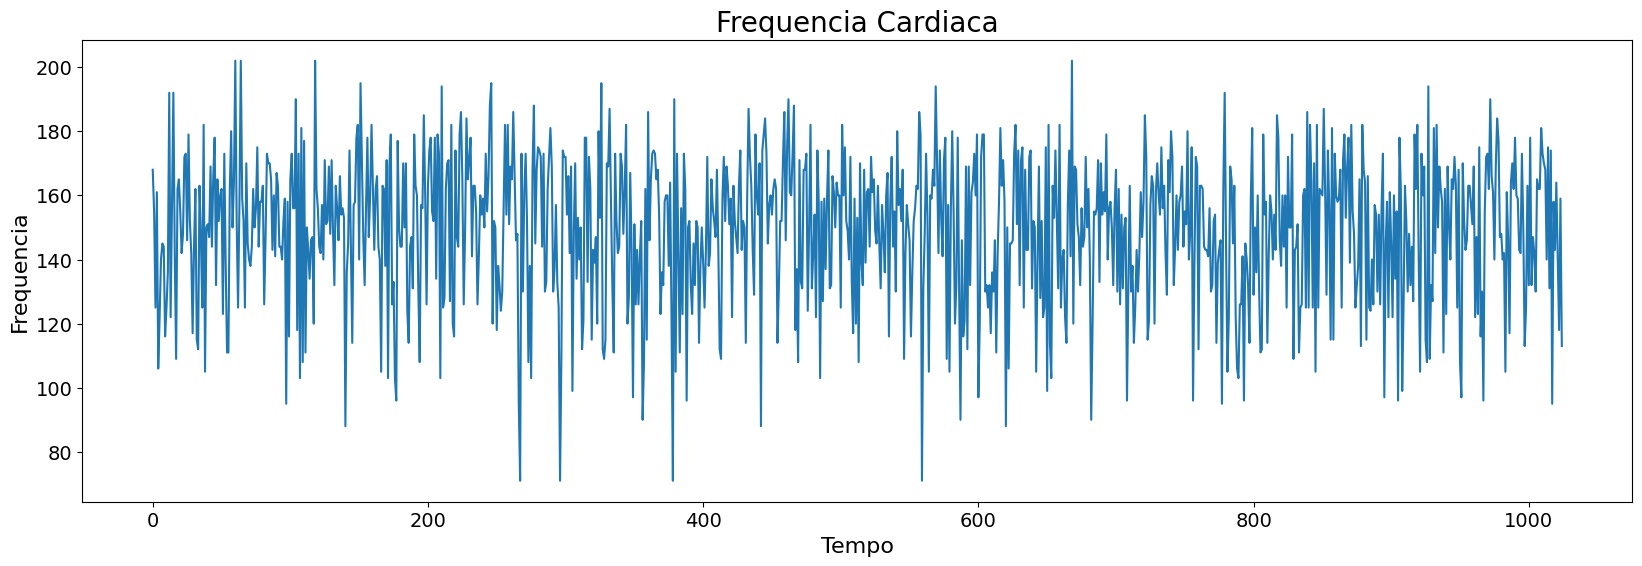

In [ ]:
# Cria as variáveis fig e ax:
fig, ax = plt.subplots(figsize=(20,6))

# Título do gráfico
ax.set_title('Frequencia Cardiaca', fontsize=20)
# Label do eixo x:
ax.set_ylabel('Frequencia', fontsize=16)
# Label do eixo y:
ax.set_xlabel('Tempo', fontsize=16)
# Plotagem dos dados da coluna "consumo".
ax = dados['thalach'].plot(fontsize=14)

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='thalach'>

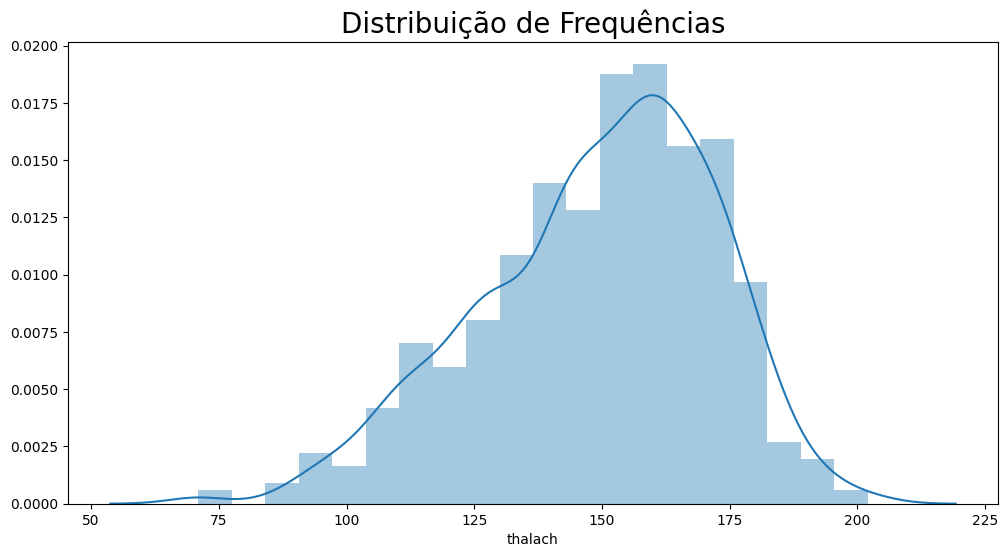

In [ ]:
ax = sns.distplot(dados['thalach'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

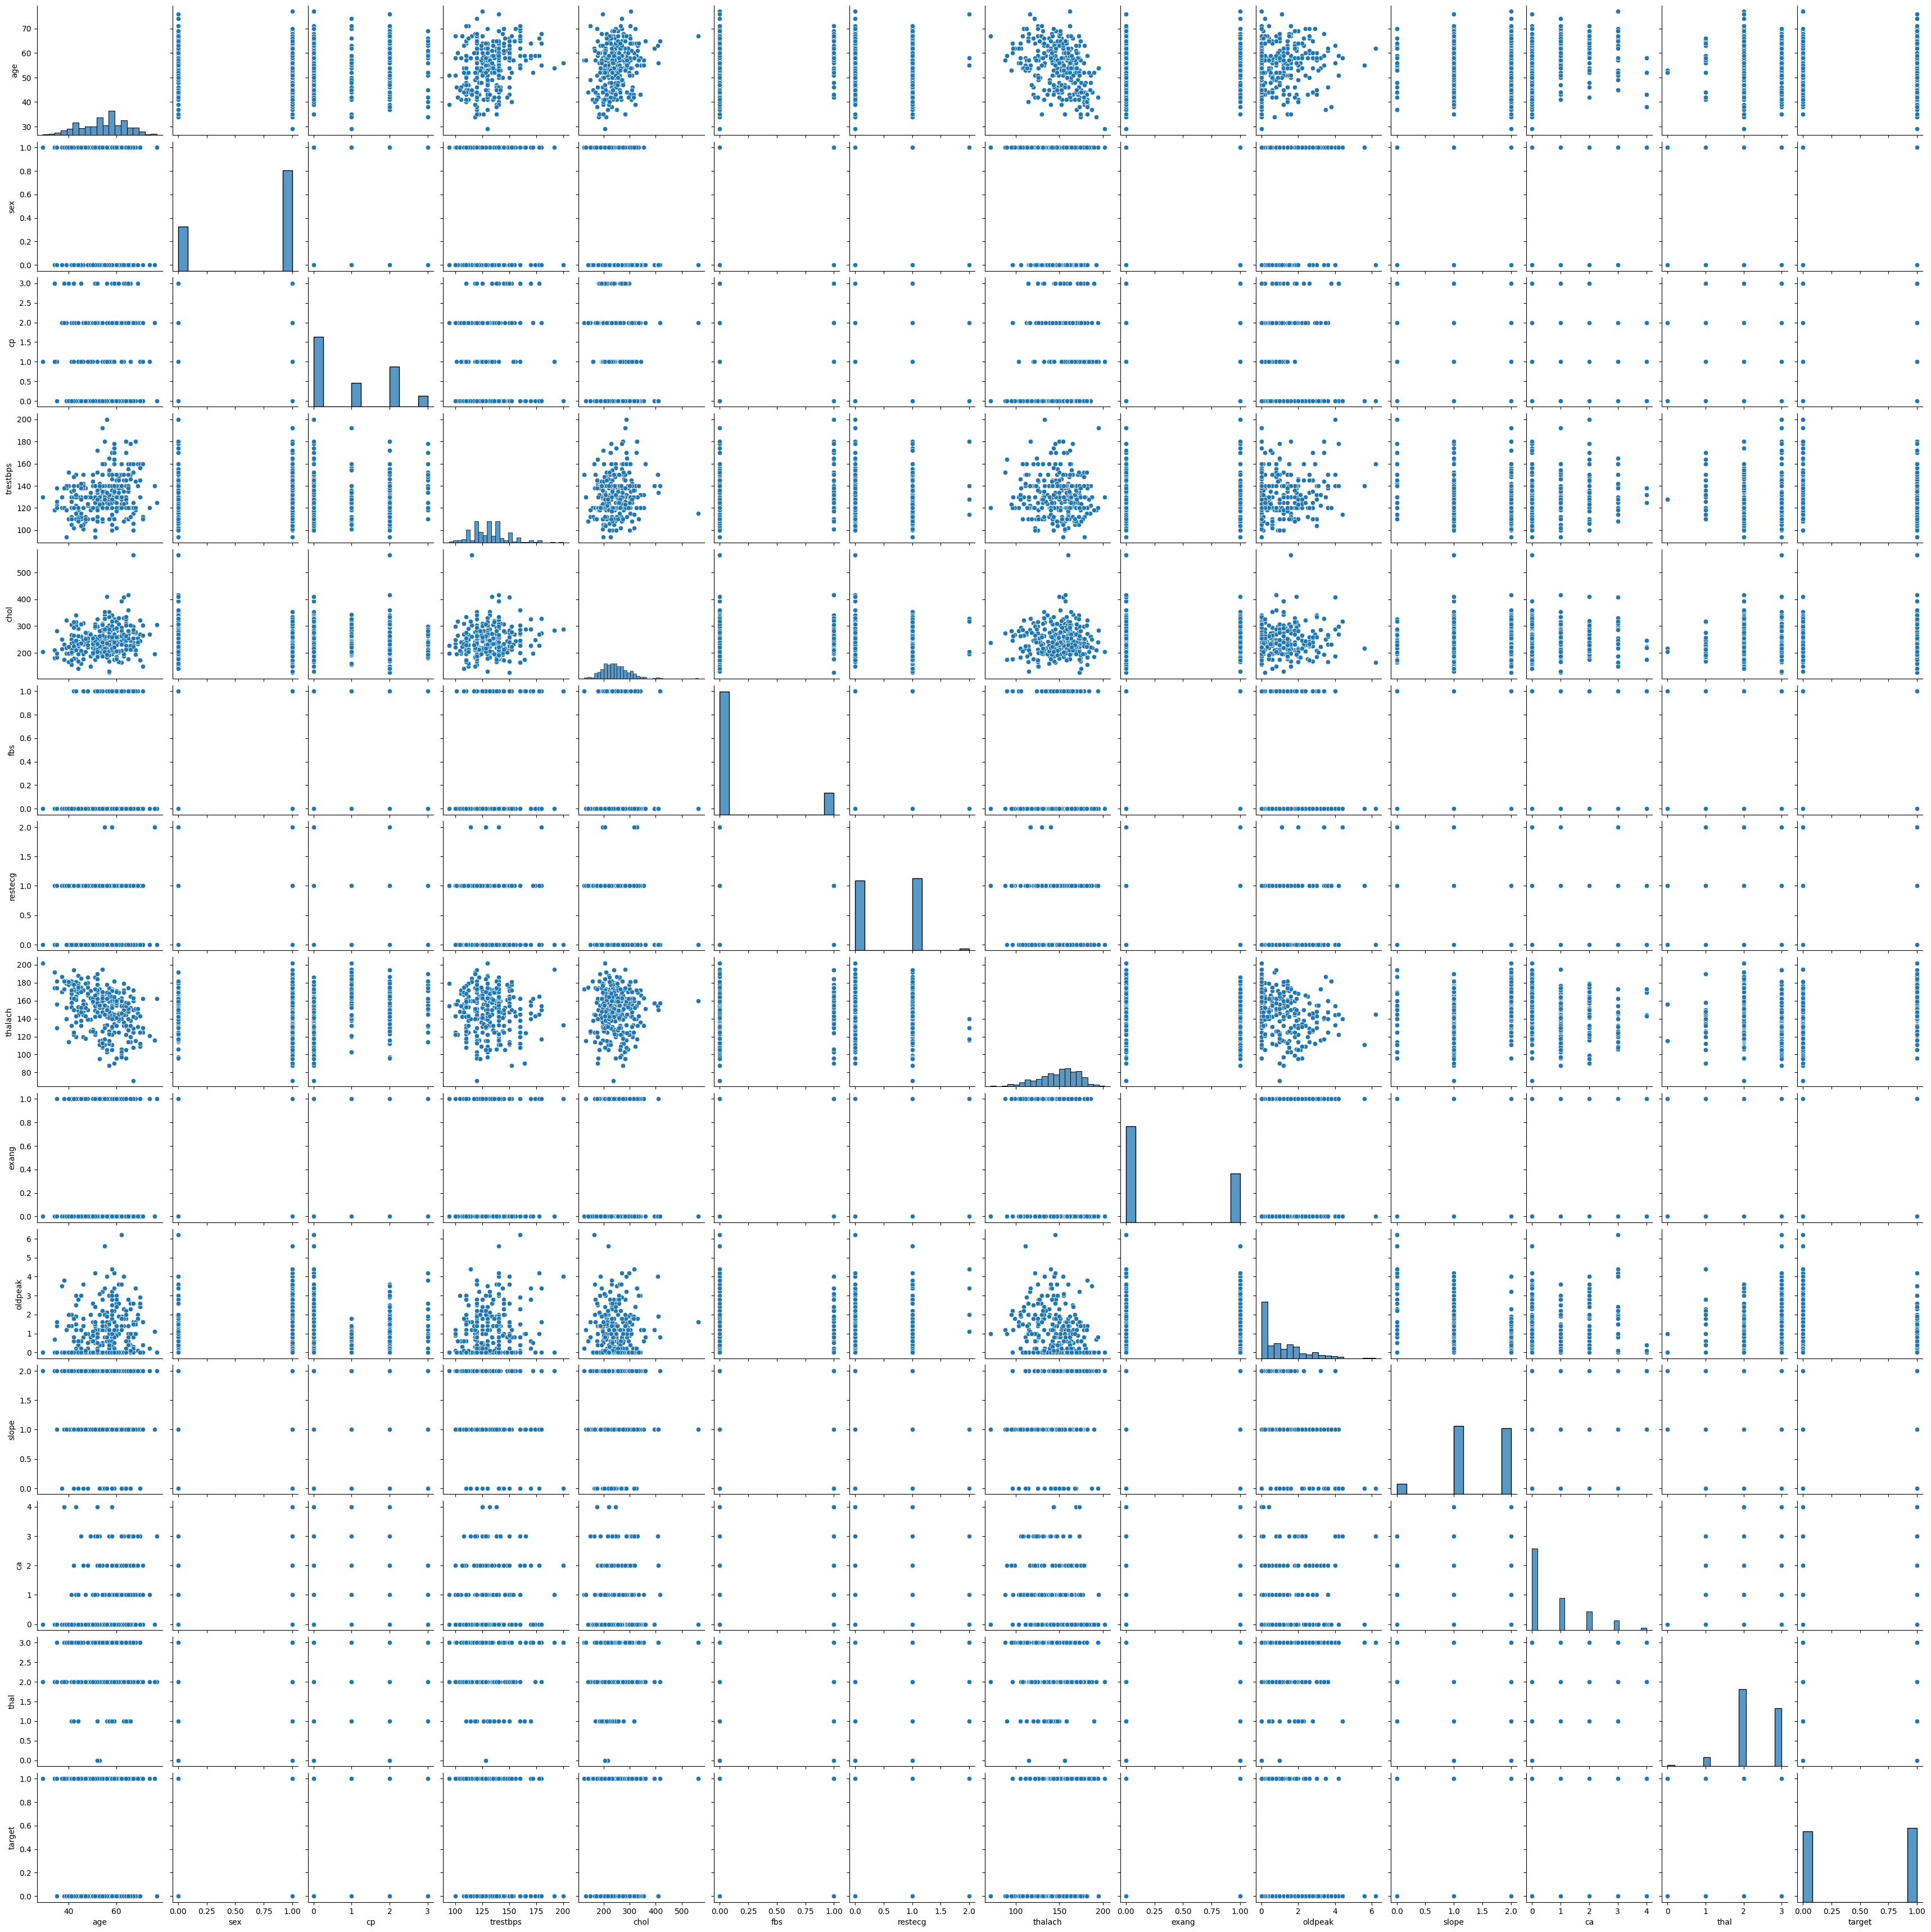

In [ ]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

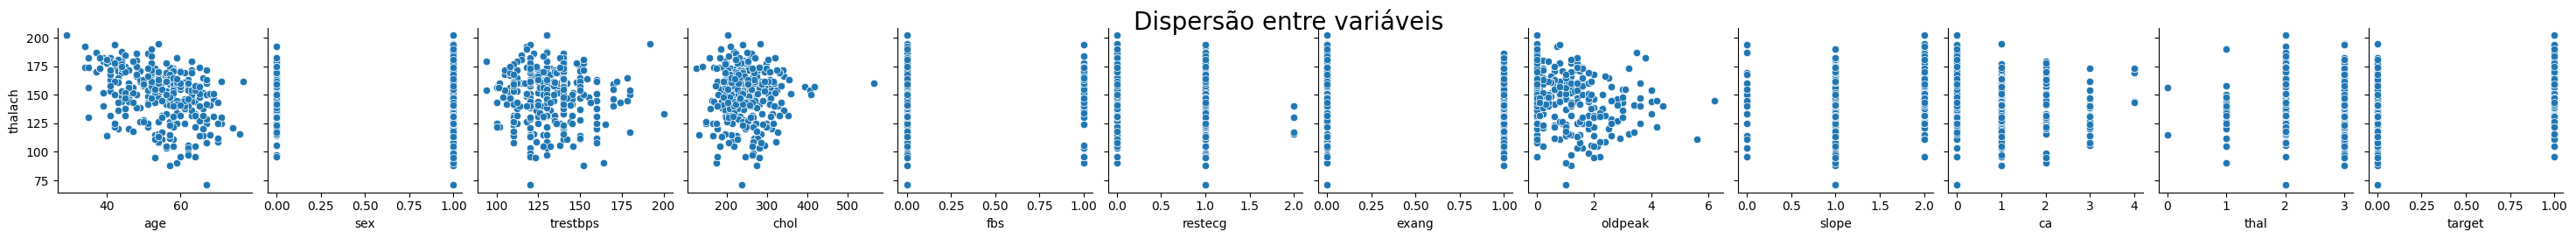

In [ ]:
# Eixo y: Variável Dependente, Eixo X: variáveis independentes.
ax = sns.pairplot(dados, y_vars='thalach', x_vars=['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'exang','oldpeak','slope','ca','thal','target'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
ax

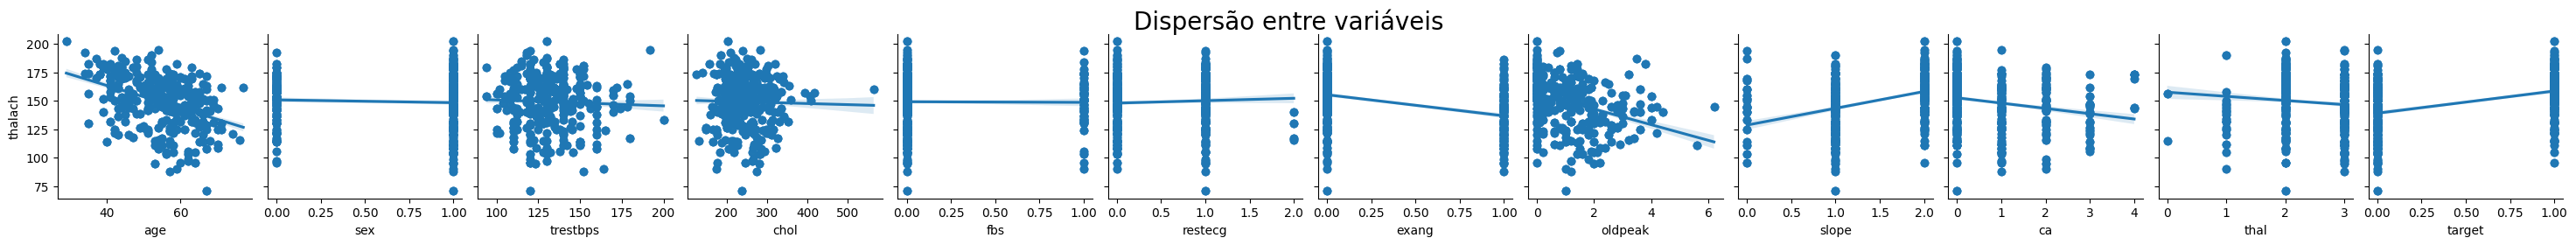

In [ ]:
# Estimando a reta de regressão com "reg".
ax = sns.pairplot(dados, y_vars='thalach', x_vars=['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'exang','oldpeak','slope','ca','thal','target'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.08)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

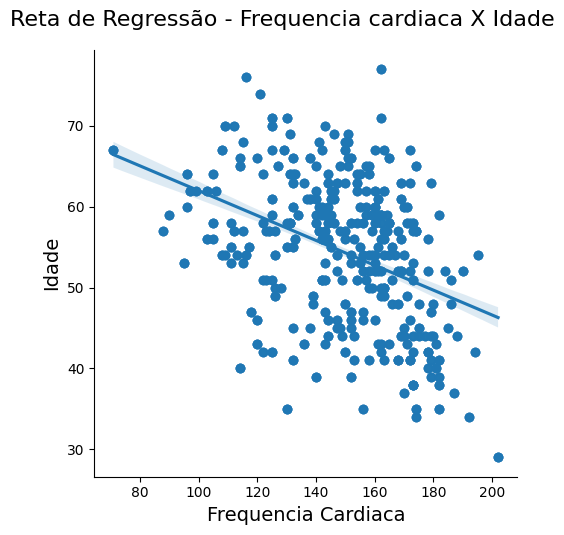

In [ ]:
ax = sns.lmplot(x="thalach", y="age", data=dados)
ax.fig.suptitle('Reta de Regressão - Frequencia cardiaca X Idade', fontsize=16, y=1.05)
ax.set_xlabels("Frequencia Cardiaca", fontsize=14)
ax.set_ylabels("Idade", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [ ]:
y = dados['thalach']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
X = dados[['age', 'sex', 'cp']]

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [ ]:
X_train.shape

(717, 3)

In [ ]:
X_test.shape

(308, 3)

In [ ]:
X_train.shape[0] + X_test.shape[0]

1025

In [ ]:
X.shape[0] * 0.7

In [ ]:
X.shape[0] * 0.3

307.5

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.25


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.19
